<a href="https://colab.research.google.com/github/garnieroeliari/topic_modeling_fr/blob/main/notebook/GPU_impot_baisser_priorite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic modelling vizualization**

Reponse à la question : "**Quels sont selon vous les impôts qu'il faut baisser en priorité ?"**

Tuto from [here](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/). 

In [ ]:
# Libraries
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

In [ ]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#stop_words = stopwords.words('english')
stop_words = stopwords.words('french')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stop_words)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [ ]:
%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
#import dataset
!ls "/content/drive/MyDrive/data_nlp_side_project/topic_data"

' description2.csv'
' description3.csv'
' description.csv'
 dina_description3.csv
 dina_LA_FISCALITE_ET_LES_DEPENSES_PUBLIQUES.csv
 dina_npr.csv
 dina_nyt-articles-2020.csv
 dina_summer-products-with-rating-and-performance_2020-08.csv
 dina_train.csv
 dina_voted-kaggle-dataset.csv
' res_description.csv'


In [ ]:
#npr = pd.read_csv('../input/npr-data/npr.csv')
#df = pd.read_csv('/content/drive/MyDrive/data_nlp_side_project/topic_data/dina_description3.csv',sep='\t',engine='python')
df = pd.read_csv('/content/drive/MyDrive/data_nlp_side_project/topic_data/dina_LA_FISCALITE_ET_LES_DEPENSES_PUBLIQUES.csv',engine='python')



In [ ]:
df.head()

id  ... QUXVlc3Rpb246MTY3 - Y a-t-il d'autres points sur les impôts et les dépenses sur lesquels vous souhaiteriez vous exprimer ?
0  UHJvcG9zYWw6YTY1MmU0YTMtMWUyMC0xMWU5LTk0ZDItZm...  ...                                                NaN                                                                        
1  UHJvcG9zYWw6ZGNhY2VhYmYtMWUyMC0xMWU5LTk0ZDItZm...  ...  Améliorer le pouvoir d’achat en augmentant les...                                                                        
2  UHJvcG9zYWw6MDhhMWNkOTQtMWUyMS0xMWU5LTk0ZDItZm...  ...                                                NaN                                                                        
3  UHJvcG9zYWw6NGZlNTVlMDMtMWUyMS0xMWU5LTk0ZDItZm...  ...                                                NaN                                                                        
4  UHJvcG9zYWw6NmQ3MmU3ZDMtMWUyMS0xMWU5LTk0ZDItZm...  ...                                                NaN                                                                        

[5 rows x 19 columns]

In [ ]:
df.shape

(186711, 19)

In [ ]:
for col in df.columns: 
    print(col) 

id
reference
title
createdAt
publishedAt
updatedAt
trashed
trashedStatus
authorId
authorType
authorZipCode
QUXVlc3Rpb246MTYy - Quelles sont toutes les choses qui pourraient être faites pour améliorer l'information des citoyens sur l'utilisation des impôts ?
QUXVlc3Rpb246MTYz - Que faudrait-il faire pour rendre la fiscalité plus juste et plus efficace ?
QUXVlc3Rpb246MTY0 - Quels sont selon vous les impôts qu'il faut baisser en priorité ?
QUXVlc3Rpb246MjA2 - Afin de financer les dépenses sociales, faut-il selon vous...
QUXVlc3Rpb246MjA1 - S'il faut selon vous revoir les conditions d'attribution de certaines aides sociales, lesquelles doivent être concernées ?
QUXVlc3Rpb246MTY1 - Quels sont les domaines prioritaires où notre protection sociale doit être renforcée ?
QUXVlc3Rpb246MTY2 - Pour quelle(s) politique(s) publique(s) ou pour quels domaines d'action publique, seriez-vous prêts à payer plus d'impôts ?
QUXVlc3Rpb246MTY3 - Y a-t-il d'autres points sur les impôts et les dépenses sur les

In [ ]:
question=df["QUXVlc3Rpb246MTY0 - Quels sont selon vous les impôts qu'il faut baisser en priorité ?"]

In [ ]:
question.head()

0                         NaN
1                         NaN
2                         NaN
3    Csg .taxe d habitation .
4                         NaN
Name: QUXVlc3Rpb246MTY0 - Quels sont selon vous les impôts qu'il faut baisser en priorité ?, dtype: object

In [ ]:
question.shape

(186711,)

In [ ]:
df_question=question

In [ ]:
df_question.shape

(186711,)

In [ ]:
new_df_question=df_question.dropna()

In [ ]:
new_df_question.shape

(140581,)

In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)

In [ ]:
# Convert to list
#data = df.title.values.tolist()
data = new_df_question.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['csg', 'taxe', 'habitation']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
 #run ONCE
 !python3 -m spacy download fr  # run in terminal once

     |████████████████████████████████| 14.7MB 13.3MB/s 
  Created wheel for fr-core-news-sm: filename=fr_core_news_sm-2.2.5-cp37-none-any.whl size=14727027 sha256=a78b788c23e00082f467f8b0ee93f1a6dc794c1fcc21f0f873f22a0416d33437
  Stored in directory: /tmp/pip-ephem-wheel-cache-laa6cu7q/wheels/46/1b/e6/29b020e3f9420a24c3f463343afe5136aaaf955dbc9e46dfc5
Successfully built fr-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/fr_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/fr
You can now load the model via spacy.load('fr')


In [ ]:
# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    #nlp = spacy.load('en', disable=['parser', 'ner'])
    nlp = spacy.load('fr', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

In [ ]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.127*"taxe" + 0.043*"tout" + 0.035*"dhabitation" + 0.026*"bien" + '
  '0.026*"foncier" + 0.020*"csg" + 0.019*"tax" + 0.016*"suppression" + '
  '0.015*"devoir" + 0.014*"supprimer"'),
 (1,
  '0.025*"plus" + 0.017*"travail" + 0.016*"charge" + 0.015*"moins" + '
  '0.015*"baisse" + 0.014*"faire" + 0.014*"social" + 0.012*"injuste" + '
  '0.012*"cest" + 0.011*"autre"'),
 (2,
  '0.167*"tva" + 0.114*"produit" + 0.096*"revenu" + 0.072*"impot" + '
  '0.046*"premiere" + 0.030*"succession" + 0.020*"produire" + 0.017*"classe" + '
  '0.015*"droit" + 0.014*"necessite"'),
 (3,
  '0.081*"impot" + 0.045*"baisser" + 0.043*"plus" + 0.034*"revenir" + '
  '0.033*"falloir" + 0.019*"retraite" + 0.017*"entreprise" + 0.016*"payer" + '
  '0.014*"non" + 0.013*"petit"')]


In [ ]:
#### I can stop here and vizualize directly with pyLDAvis

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  ...                                               Text
0            0  ...                                 [taxe, habitation]
1            1  ...      [impot, salaire, retraite, compris, retraite]
2            2  ...                                           [revenu]
3            3  ...                                    [impot, revenu]
4            4  ...                           [revenir, citoyen, egal]
5            5  ...  [impot, production, parfair, suppression, lisf...
6            6  ...                                              [isf]
7            7  ...  [baisser, tva, lalimentation, premier, necessi...
8            8  ...                           [tva, produit, premiere]
9            9  ...                                [taxe, dhabitation]

[10 rows x 5 columns]

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  ...                                                                                  Representative Text
0        0.0  ...  [suppression, tax, foncier, pourquoi, payer, bien, appartenir, piyr, deja, paie, suppression, se...
1        1.0  ...  [baisse, nest, fin, soi, cest, cotisation, achat, service, prive, plus, couteux, forcemer, plus,...
2        2.0  ...  [tva, produire, base, alimentaire, hygiene, pain, ler, riz, semoul, savon, serviette, tampon, et...
3        3.0  ...          [impot, revenir, inferieur, mois, personne, seul, mois, couple, mois, couple, mois, enfant]

[4 rows x 4 columns]

In [ ]:
import matplotlib.pyplot as plt


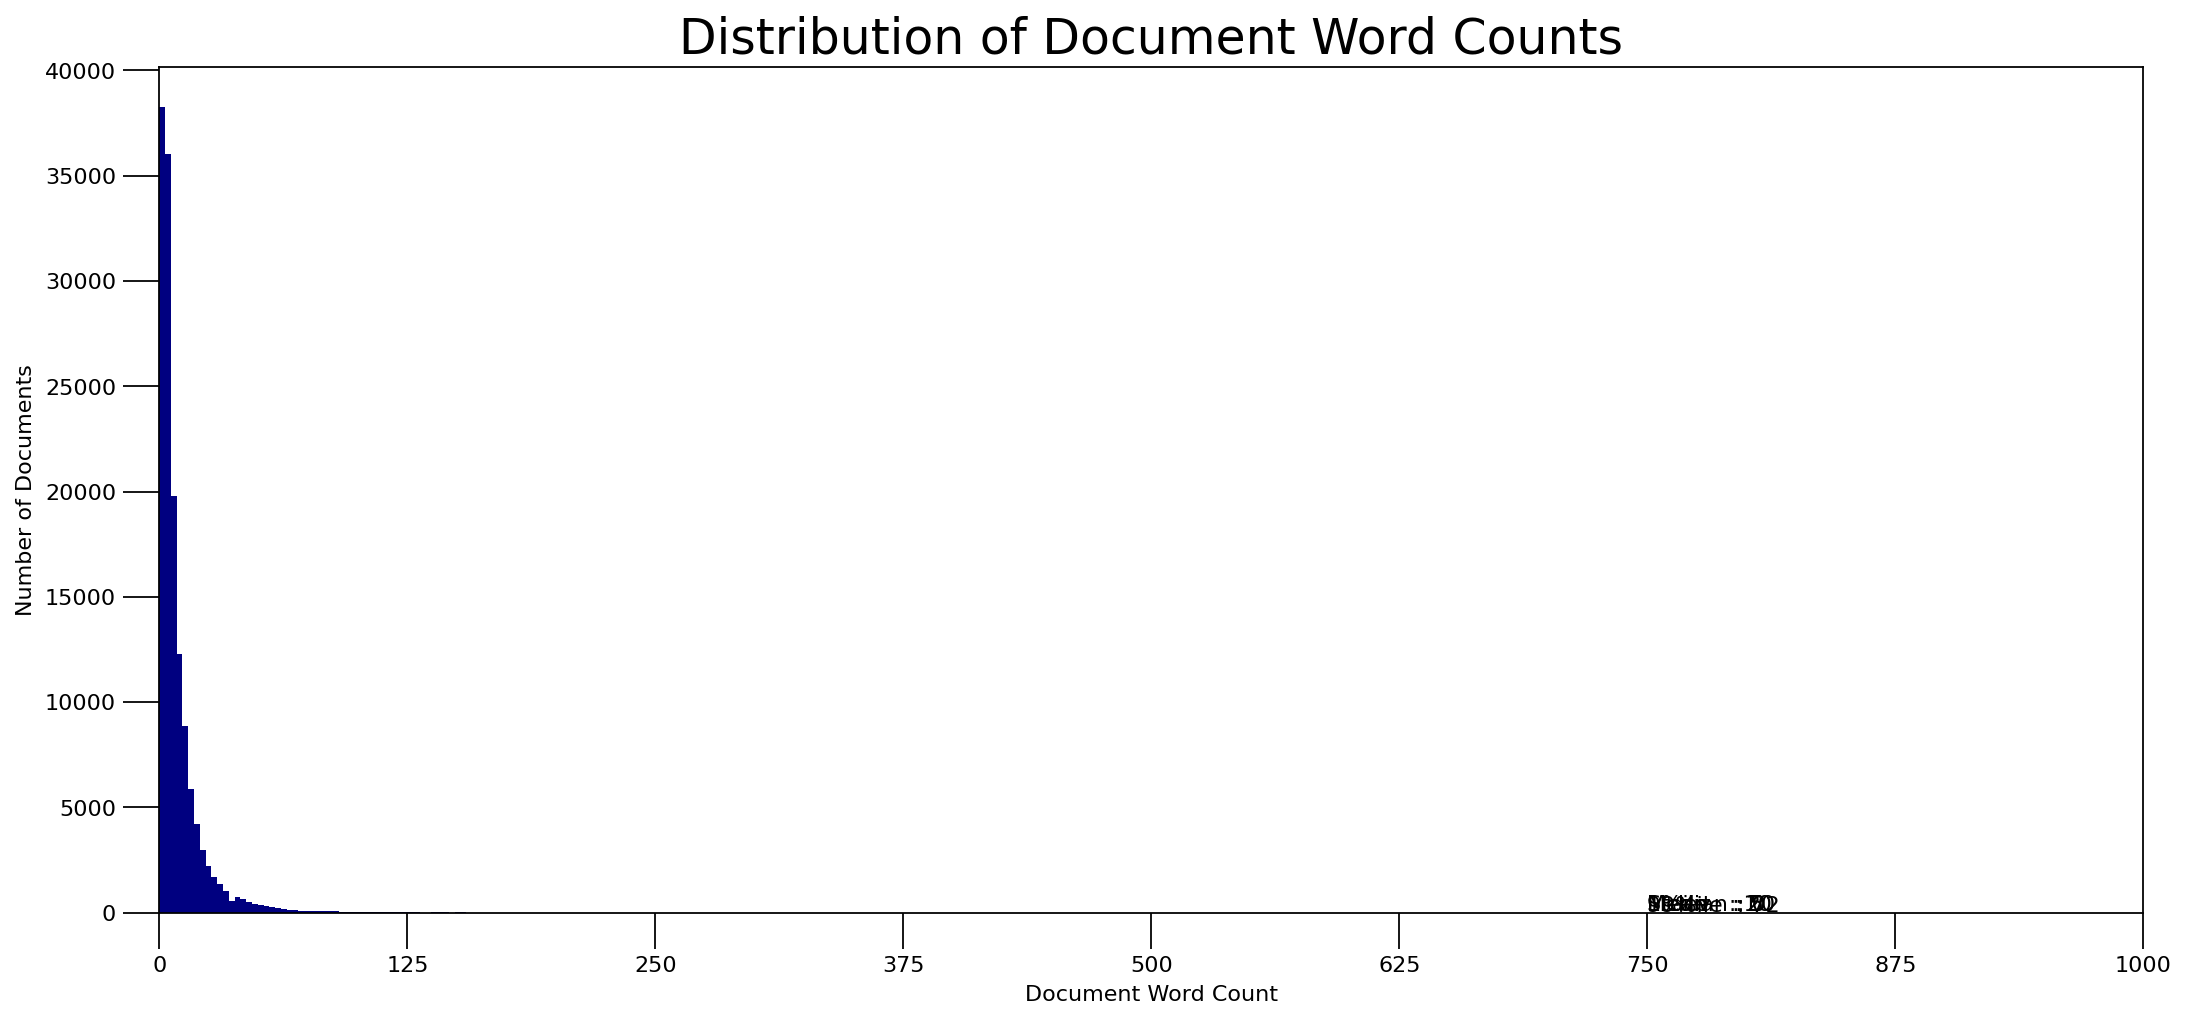

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

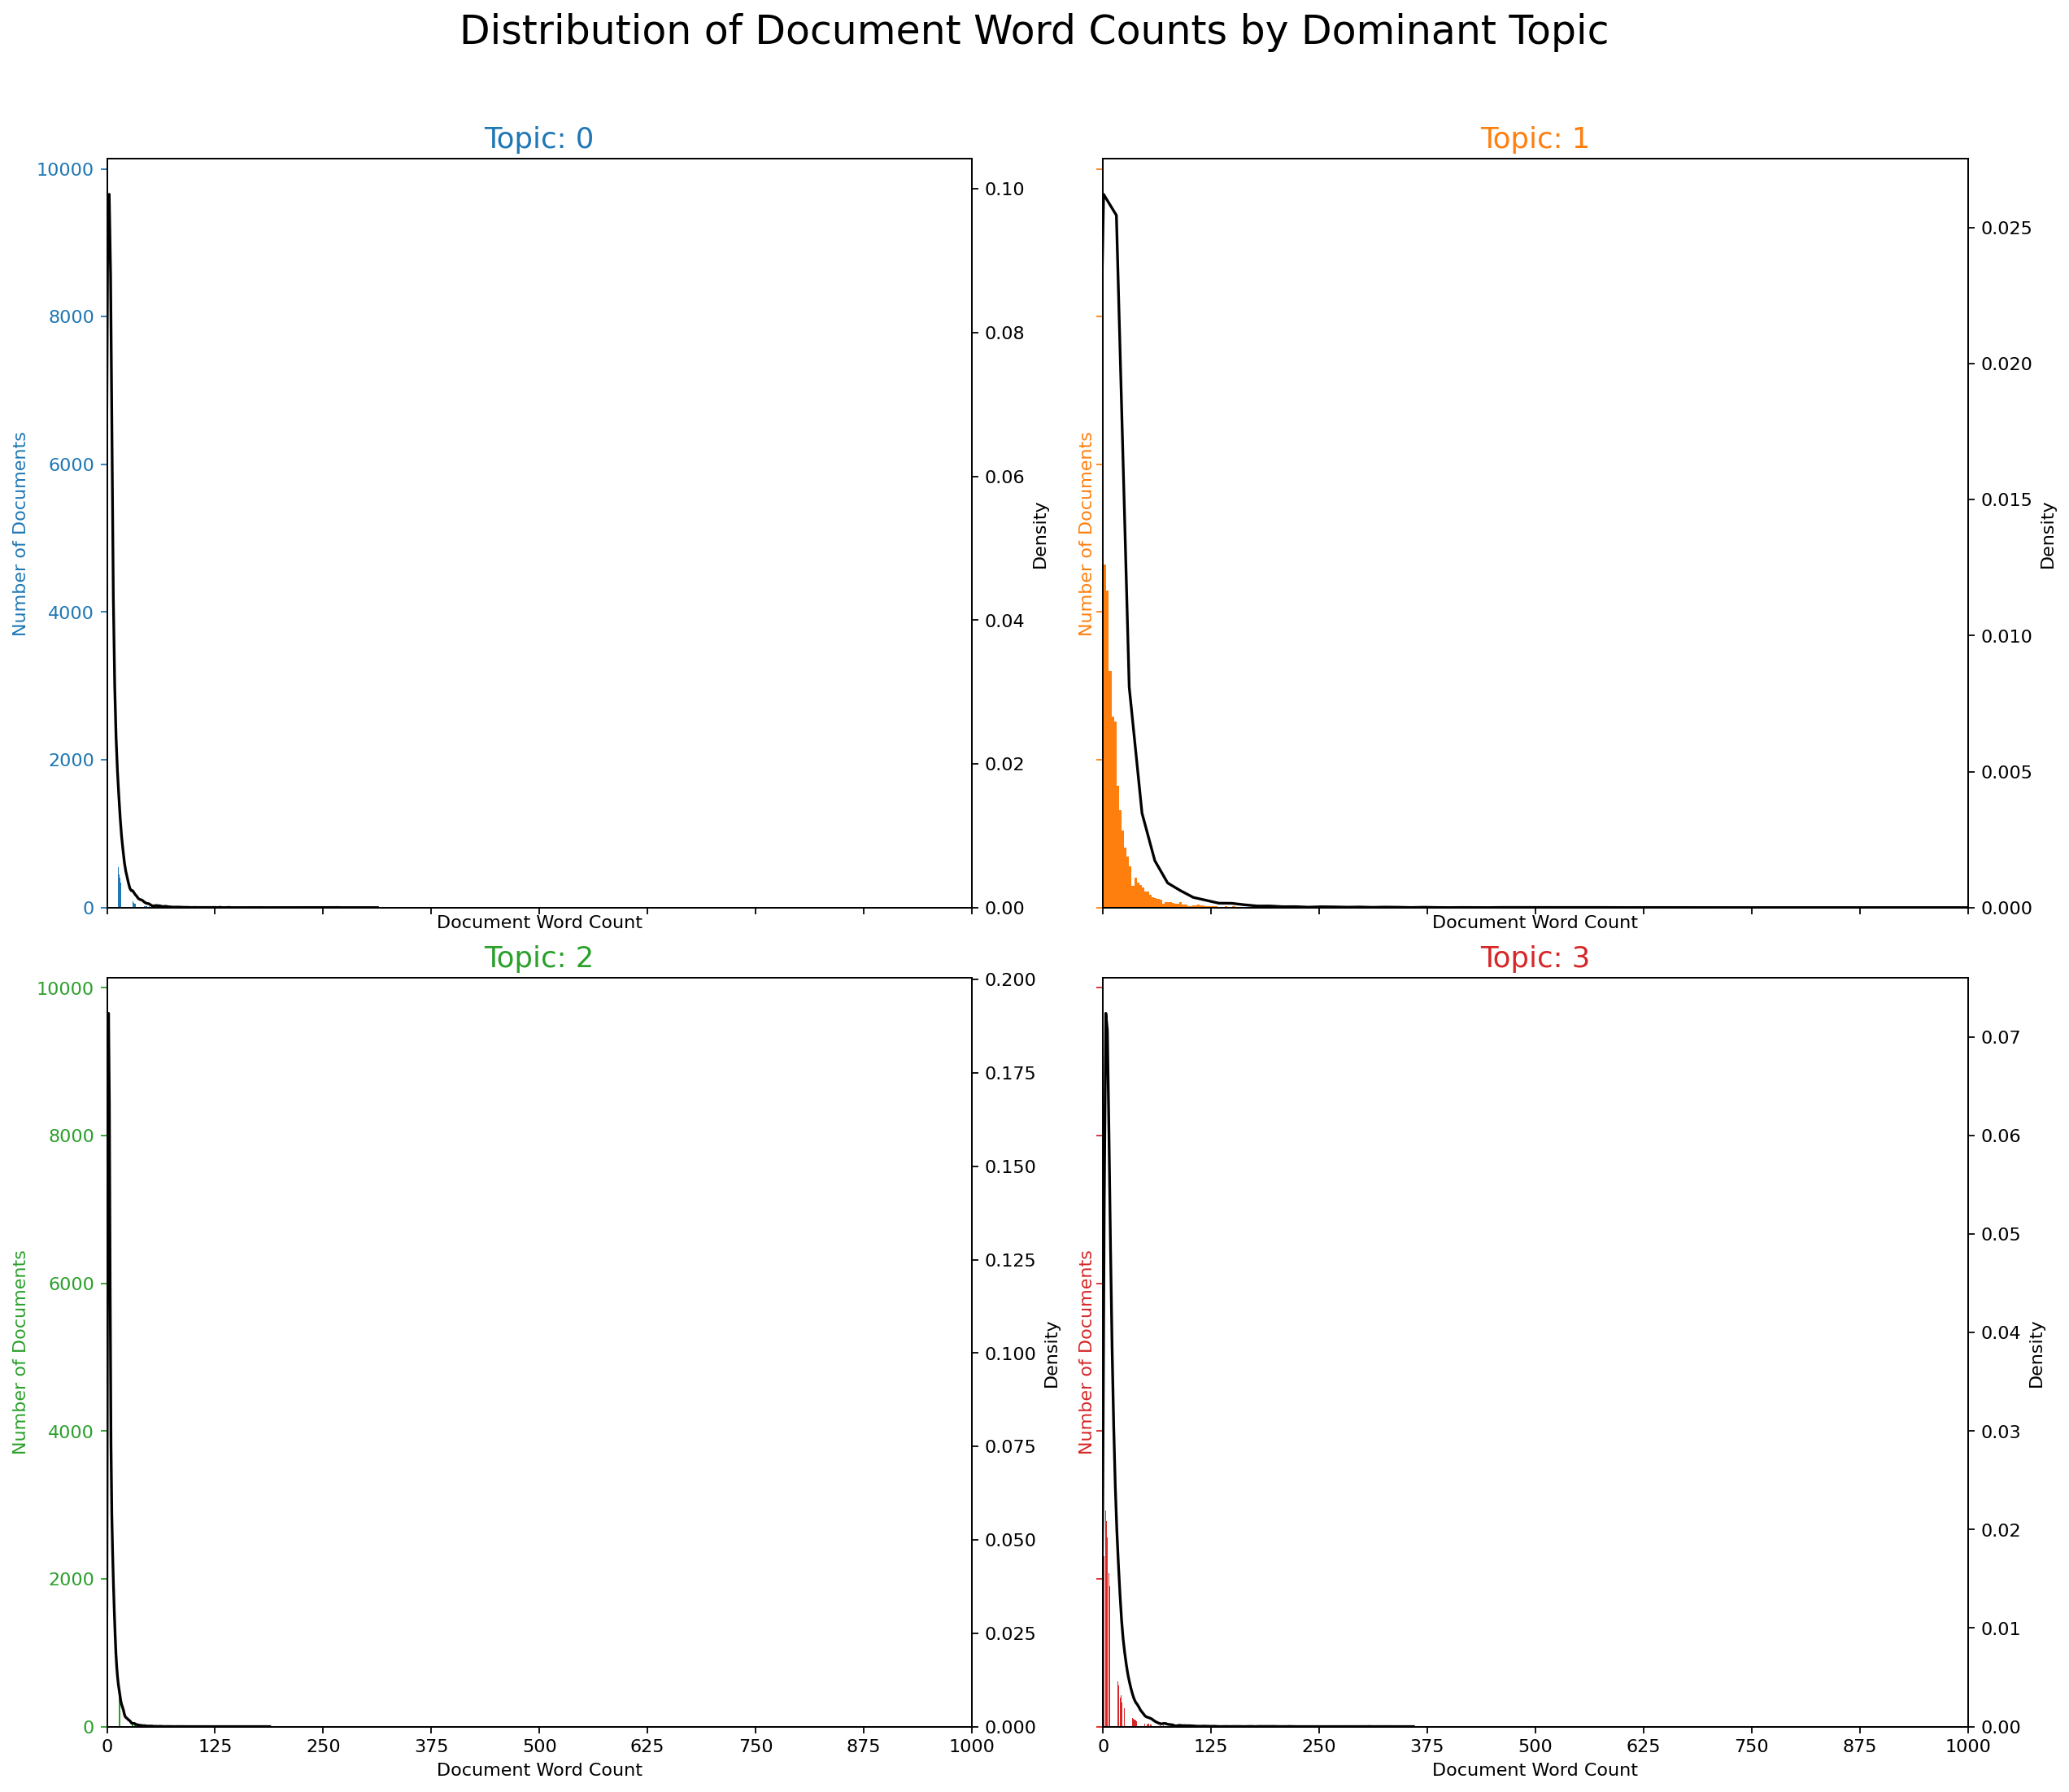

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

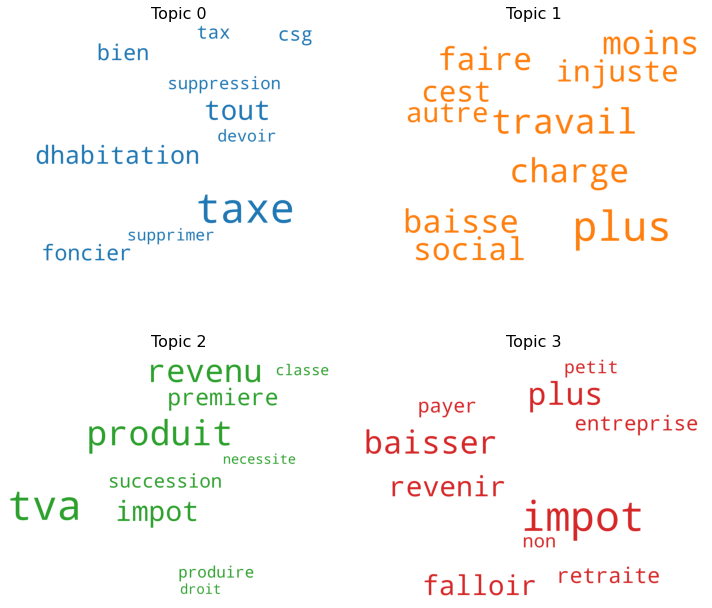

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()



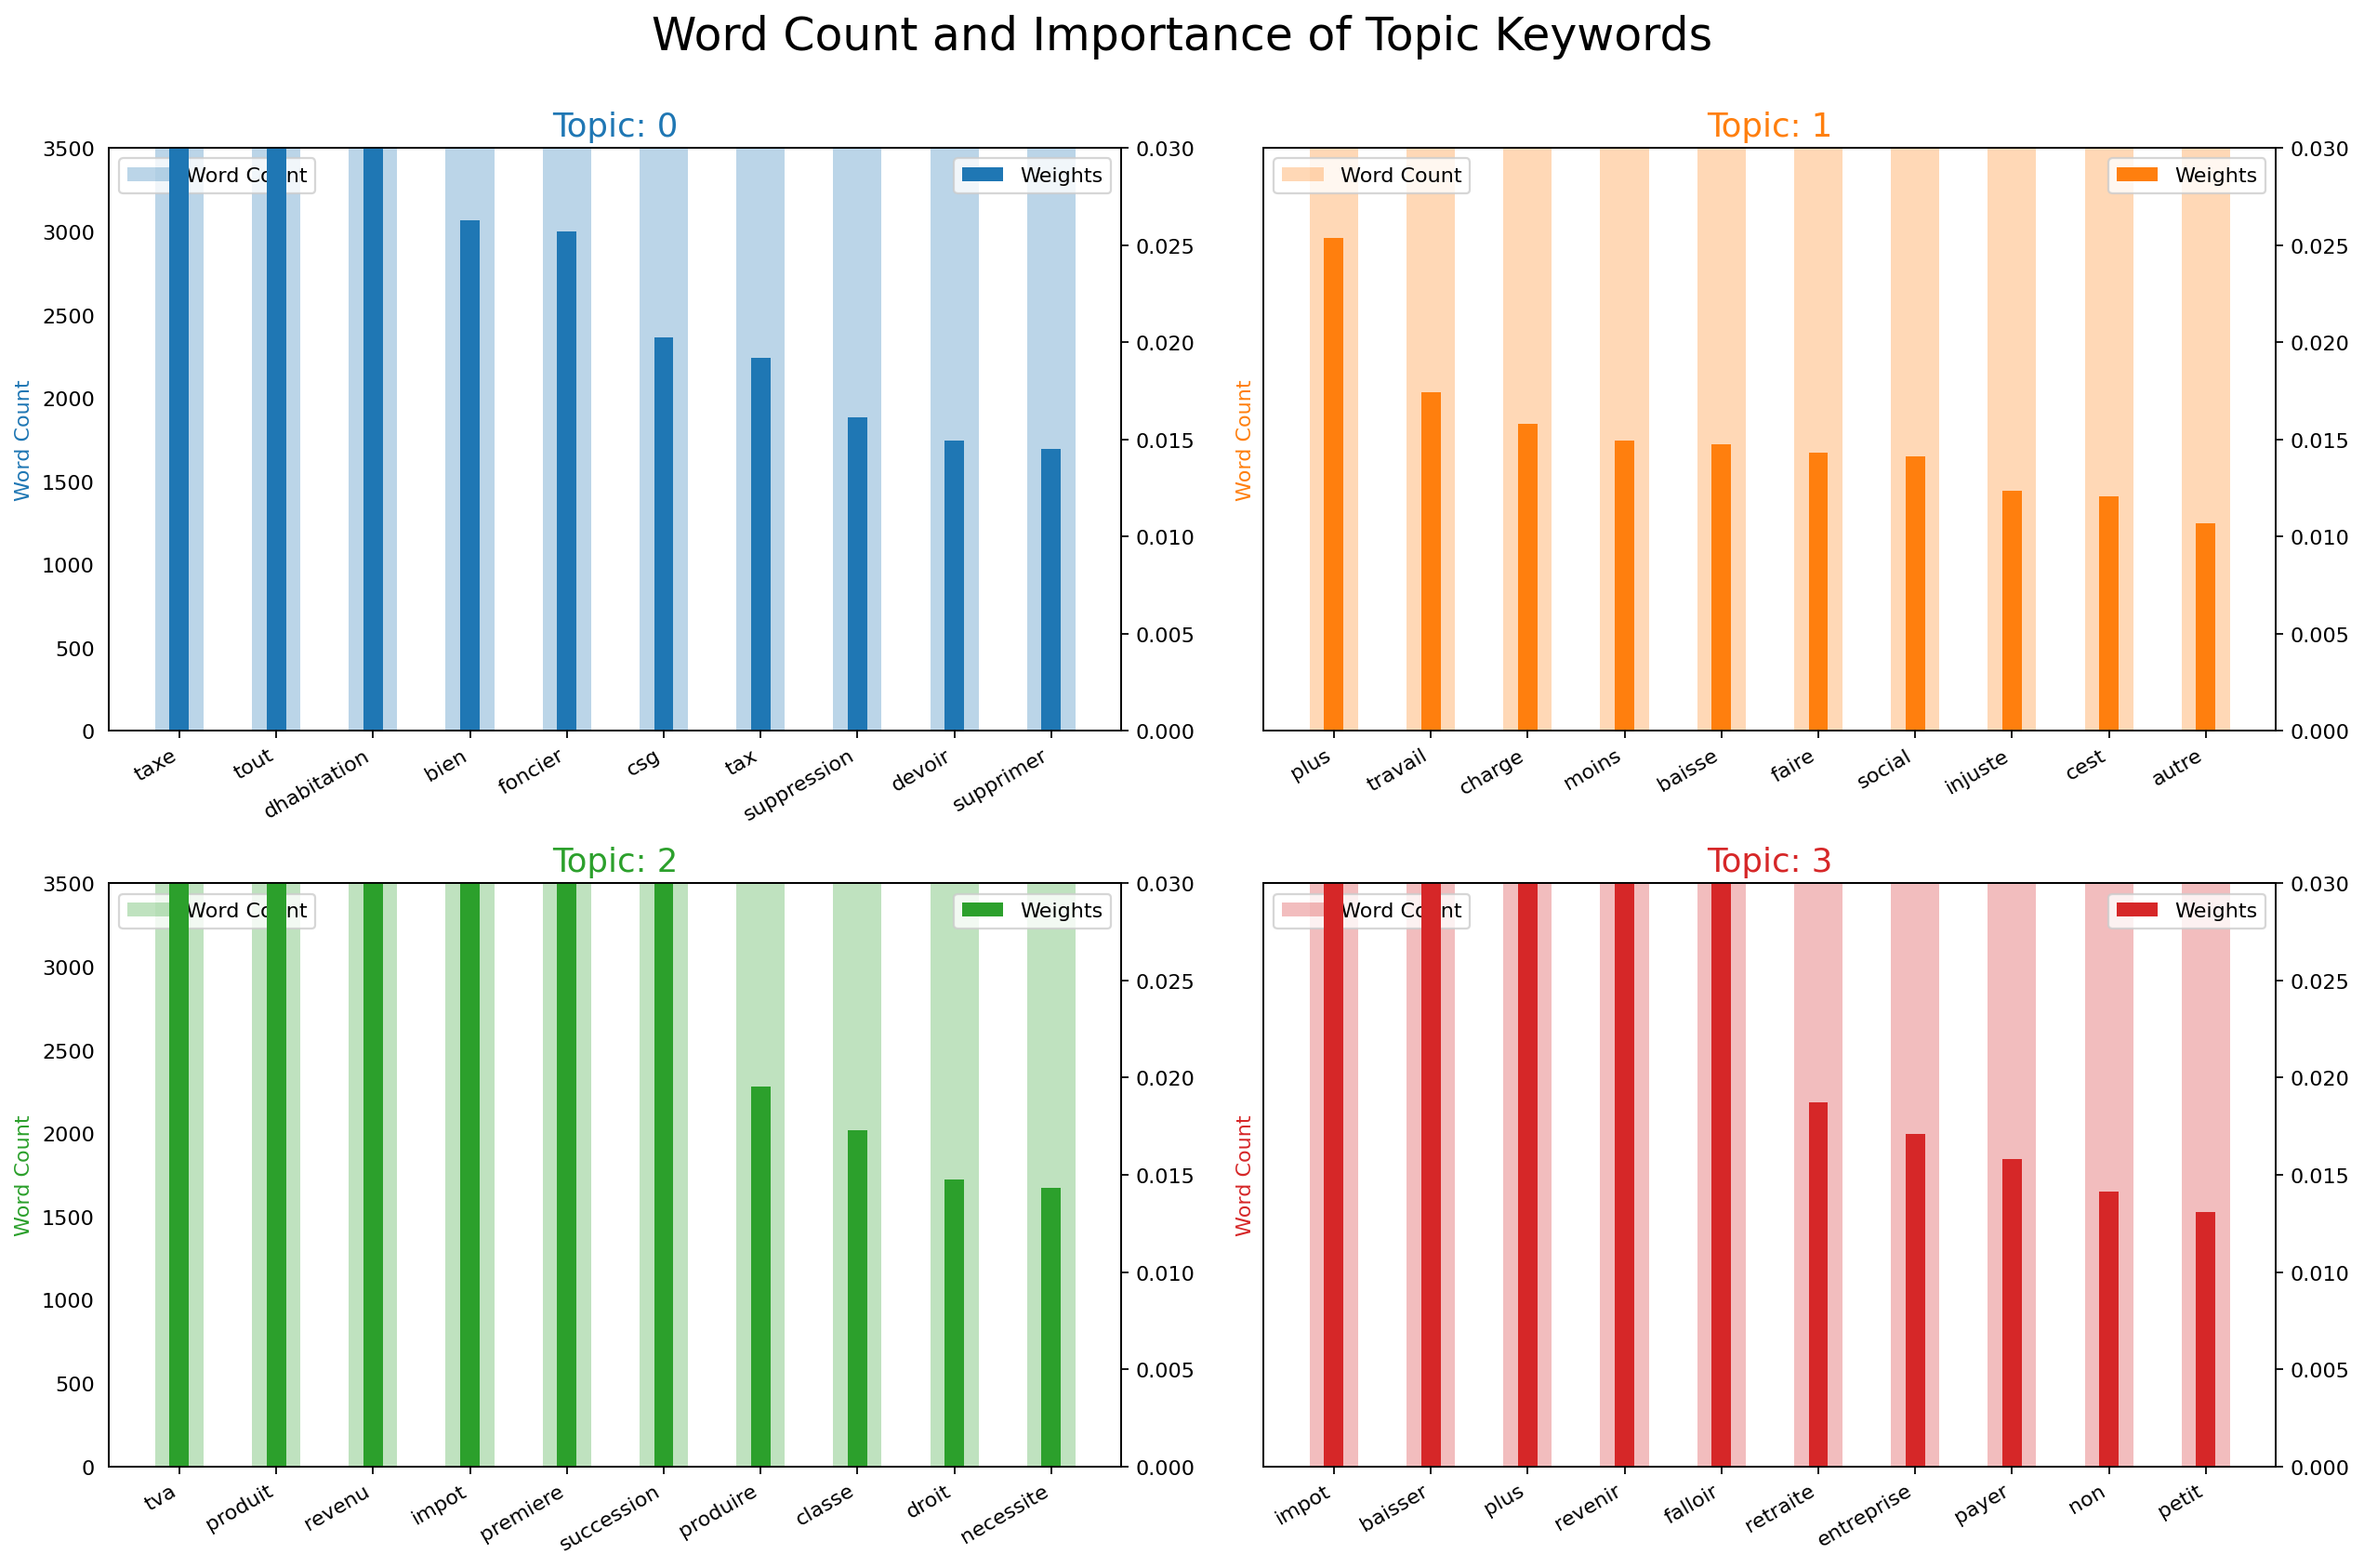

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()



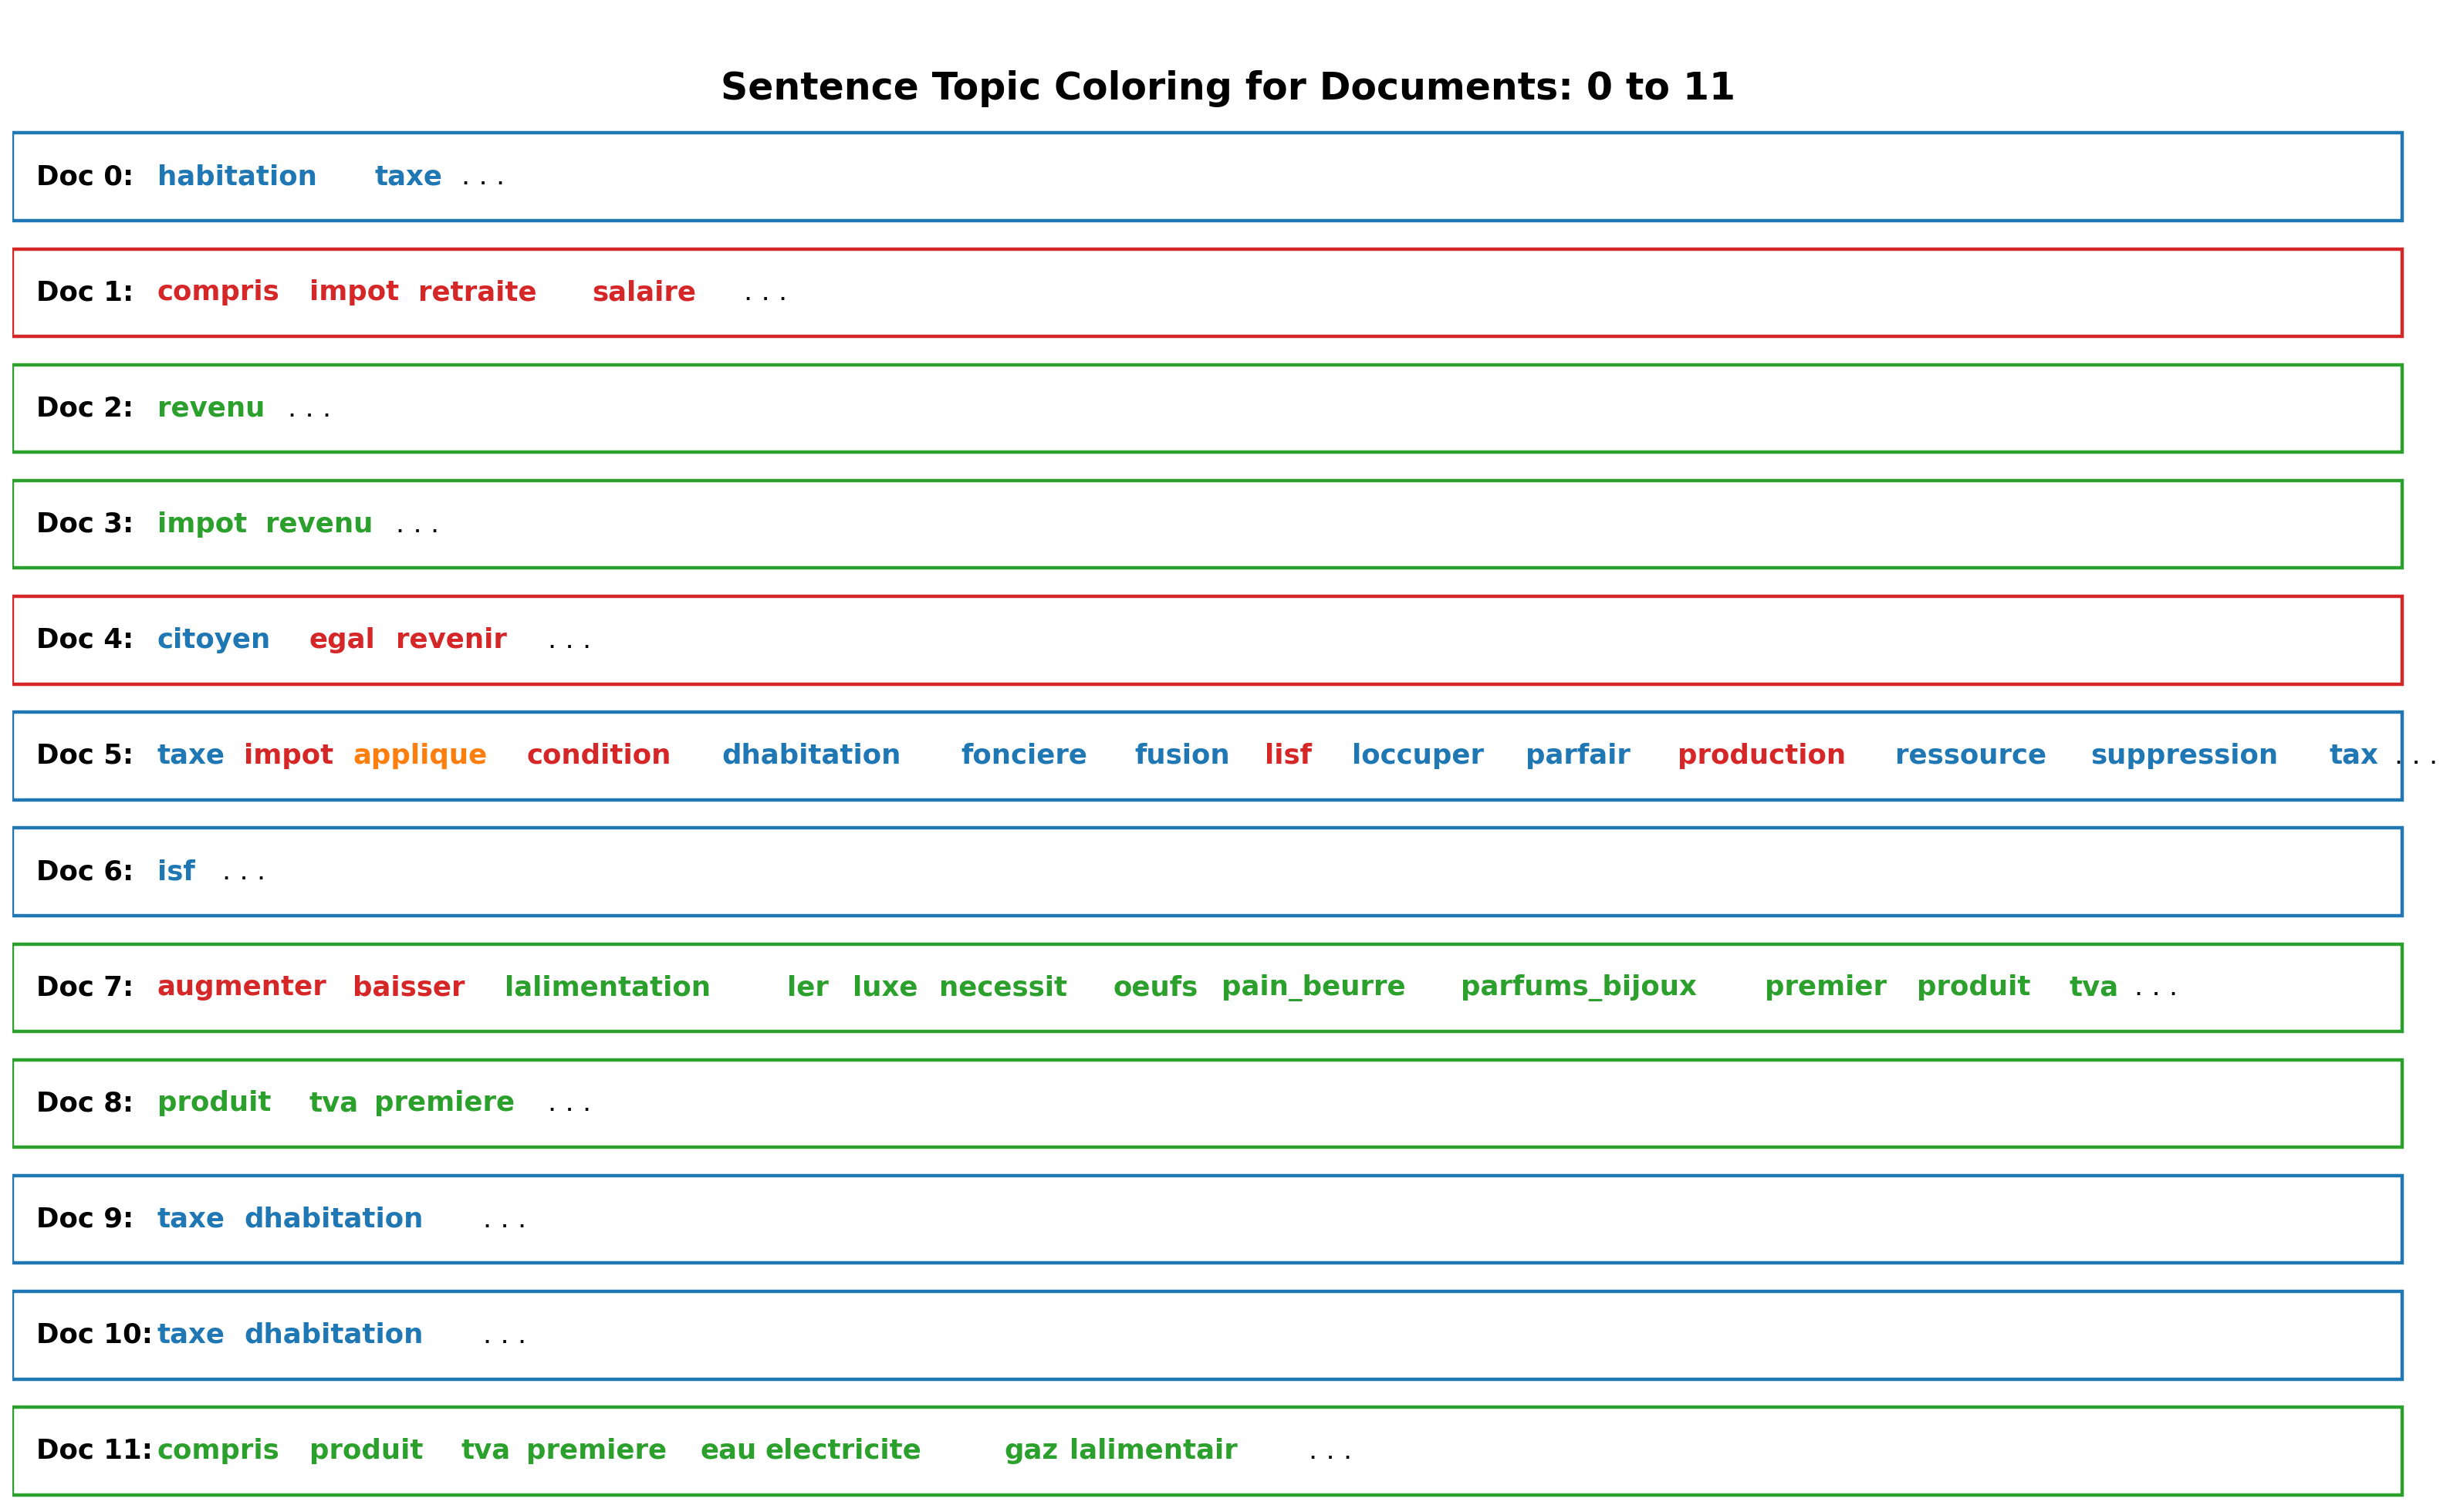

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    



In [ ]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)



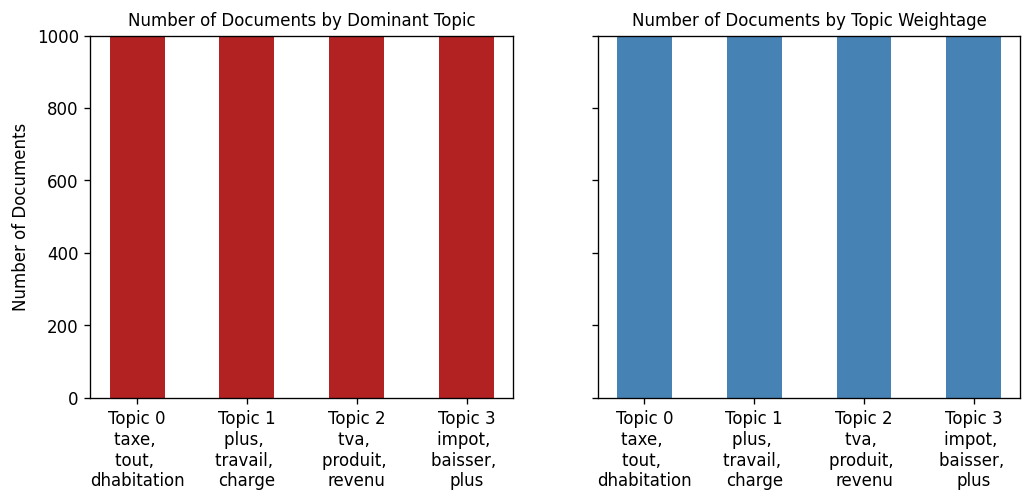

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [ ]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 129559 samples in 0.222s...
[t-SNE] Computed neighbors for 129559 samples in 4.496s...
[t-SNE] Computed conditional probabilities for sample 1000 / 129559
[t-SNE] Computed conditional probabilities for sample 2000 / 129559
[t-SNE] Computed conditional probabilities for sample 3000 / 129559
[t-SNE] Computed conditional probabilities for sample 4000 / 129559
[t-SNE] Computed conditional probabilities for sample 5000 / 129559
[t-SNE] Computed conditional probabilities for sample 6000 / 129559
[t-SNE] Computed conditional probabilities for sample 7000 / 129559
[t-SNE] Computed conditional probabilities for sample 8000 / 129559
[t-SNE] Computed conditional probabilities for sample 9000 / 129559
[t-SNE] Computed conditional probabilities for sample 10000 / 129559
[t-SNE] Computed conditional probabilities for sample 11000 / 129559
[t-SNE] Computed conditional probabilities for sample 12000 / 129559
[t-SNE] Computed conditional probabi

In [ ]:
## vizualization with pyLDAVIS

In [ ]:
#run ONCE
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.139169  0.297764       1        1  30.832103
3     -0.126669  0.113822       2        1  29.963450
0      0.288502 -0.255995       3        1  21.447551
2     -0.301003 -0.155590       4        1  17.756896, topic_info=          Term          Freq         Total Category  logprob  loglift
35         tva  40981.000000  40981.000000  Default  30.0000  30.0000
1         taxe  37654.000000  37654.000000  Default  29.0000  29.0000
34     produit  28009.000000  28009.000000  Default  28.0000  28.0000
6       revenu  23520.000000  23520.000000  Default  27.0000  27.0000
3        impot  51438.000000  51438.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
3        impot  17748.337869  51438.574456   Topic4  -2.6284   0.6643
726  notamment   1514.630709   2720.417423   Topic4  -5.0895   1.1428
185       taux   1455.050877   4619.768642   Topic4  -5.1297   0.5731
220      moyen   1304.891055   4121.822339   Topic4  -5.2386   0.5782
371        etc   1000.216640   3419.488131   Topic4  -5.5045   0.4991

[170 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
702       4  0.999815   alimentaire
722       4  0.999453  alimentation
307       1  0.999644         alors
178       1  0.999769            an
24        2  0.999789     augmenter
...     ...       ...           ...
165       3  0.202352          trop
35        4  0.999981           tva
374       3  0.999859           vie
43        1  0.999838          voir
94        4  0.999286       voiture

[144 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])